# Breast cancer classification using ANN

classifies into malignant or benign based on features

Getting the dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)


The dataset is available as X and y from the uci website.

In [ ]:
# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

Importing required libraries

In [ ]:
import keras
import numpy as np
import pandas as pd

In [ ]:
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [ ]:
X.shape , y.shape

((569, 30), (569, 1))

In [ ]:
X.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
y.isna().sum()

Diagnosis    0
dtype: int64

In [ ]:
y['Diagnosis'] = np.where(y['Diagnosis']=='M', 1, 0)

<ipython-input-48-52ae46831a74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = np.where(y['Diagnosis']=='M', 1, 0)


In [ ]:
y.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split

#  'X' contains the features and 'y' contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


Data Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(X_train)

array([[0.06552721, 0.25769361, 0.07732252, ..., 0.60137457, 0.52493594,
        0.52950153],
       [0.65620256, 0.57017247, 0.67420686, ..., 0.9975945 , 0.49931007,
        0.62190573],
       [0.07257946, 0.14034494, 0.08023901, ..., 0.174811  , 0.33845851,
        0.25313666],
       ...,
       [0.32317939, 0.2404464 , 0.30146536, ..., 0.11453608, 0.17602996,
        0.05222109],
       [0.30799745, 0.33513696, 0.30729834, ..., 0.62783505, 0.31815494,
        0.42777213],
       [0.21984426, 0.36557322, 0.20842225, ..., 0.25536082, 0.22255076,
        0.11648016]])

Defining ann seqential model

In [ ]:
!pip install keras


In [ ]:
# keras api
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
from keras.utils import plot_model



In [ ]:
Classification_Model = Sequential()

Arguments of Dense Layer

Taking 3 layers. 1 hidden layer.

In [ ]:
Classification_Model.add(Dense(units= 16, activation = 'relu', input_dim=30))
Classification_Model.add(Dense(units=6, activation='relu'))
Classification_Model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
Classification_Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
print(Classification_Model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                496       
                                                                 
 dense_10 (Dense)            (None, 6)                 102       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 605 (2.36 KB)
Trainable params: 605 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


plotting the layers

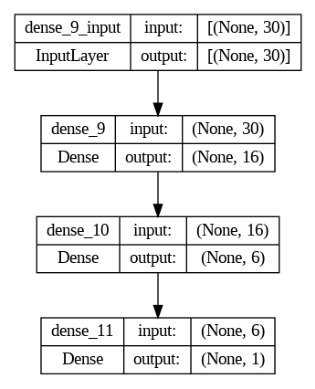

In [ ]:
plot_model(Classification_Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Training the model

In [ ]:
Classification_Model.fit(X_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
455/455 [==============================] - 1s 1ms/step - loss: 3.8253 - accuracy: 0.6088
Epoch 2/20
455/455 [==============================] - 0s 980us/step - loss: 1.4519 - accuracy: 0.8000
Epoch 3/20
455/455 [==============================] - 1s 1ms/step - loss: 1.4392 - accuracy: 0.8044
Epoch 4/20
455/455 [==============================] - 1s 2ms/step - loss: 1.6029 - accuracy: 0.8264
Epoch 5/20
455/455 [==============================] - 1s 2ms/step - loss: 1.2954 - accuracy: 0.8352
Epoch 6/20
455/455 [==============================] - 1s 2ms/step - loss: 1.2503 - accuracy: 0.8242
Epoch 7/20
455/455 [==============================] - 1s 2ms/step - loss: 1.1926 - accuracy: 0.8549
Epoch 8/20
455/455 [==============================] - 1s 2ms/step - loss: 1.2371 - accuracy: 0.8462
Epoch 9/20
455/455 [==============================] - 1s 2ms/step - loss: 1.2125 - accuracy: 0.8462
Epoch 10/20
455/455 [==============================] - 1s 2ms/step - loss: 1.1739 - accuracy: 0.84

Predicting with test data

In [ ]:
pred = Classification_Model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
# continuous predictions to binary
threshold = 0.5
pred = np.where(pred > threshold, 1, 0)

Evaluation metrics

measuring performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.8837209302325582
F1 Score: 0.9382716049382717



cross entropy loss



In [ ]:
from sklearn.metrics import log_loss

cross_entropy_loss = log_loss(y_test, pred)

print("Cross-Entropy Loss:", cross_entropy_loss)

Cross-Entropy Loss: 1.5808619907507522
